- Feature Extraction
- Visualization
- Model's Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
x = df.drop(columns = ["Type"])
y = df["Type"]

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_xtrain = sc.fit_transform(xtrain)
sc_xtest = sc.fit_transform(xtest)

In [9]:
from sklearn.decomposition  import PCA
pca = PCA()
pca.fit(sc_xtrain)
pca.explained_variance_ratio_

array([2.97953561e-01, 2.06577739e-01, 1.57093544e-01, 1.33576784e-01,
       1.00646739e-01, 5.51996719e-02, 4.09963275e-02, 7.75573030e-03,
       1.99903424e-04])

In [10]:
val = np.cumsum(pca.explained_variance_ratio_)*100
val

array([ 29.79535612,  50.45312998,  66.16248442,  79.52016279,
        89.58483669,  95.10480388,  99.20443663,  99.98000966,
       100.        ])

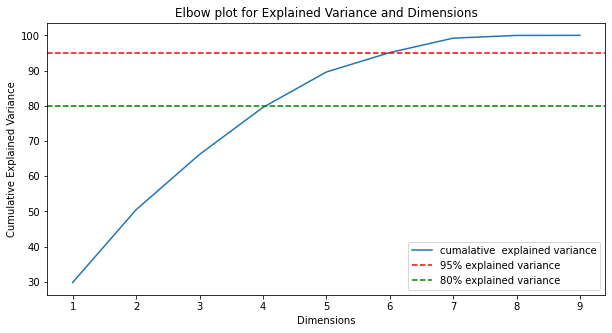

In [11]:
plt.figure(figsize = (10,5))
plt.plot(range(1,len(val)+1), val,label="cumalative  explained variance")
plt.axhline(y = 95, color ="r", linestyle = "--", label = "95% explained variance")
plt.axhline(y = 80, color ="g", linestyle = "--", label = "80% explained variance")
plt.title("Elbow plot for Explained Variance and Dimensions")
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Explained Variance")
plt.legend()

In [12]:
pca = PCA(n_components = 0.95)
pca.fit(sc_xtrain)
pca_xtrain = pca.transform(sc_xtrain)

In [13]:
pca.components_

array([[ 0.49681108, -0.27110731,  0.16425381, -0.44444863, -0.14204186,
        -0.2315733 ,  0.45282991, -0.38225064,  0.17376164],
       [ 0.31980441,  0.28691584, -0.61451996,  0.17576571, -0.03380587,
        -0.2562002 ,  0.42412429,  0.39889622, -0.03309199],
       [ 0.15133932, -0.3174172 , -0.12532904,  0.38629075, -0.51357333,
         0.61306175,  0.11853946, -0.01220527,  0.24002494],
       [-0.20393213, -0.49870527, -0.32548966,  0.11653735,  0.67379117,
         0.06569031,  0.19596659, -0.11618708,  0.28278645],
       [-0.06253034,  0.21005765,  0.13533624,  0.04592365, -0.07889147,
        -0.25797652, -0.16817364,  0.16803723,  0.89568199],
       [-0.18194539,  0.57792369, -0.32582822, -0.1271457 ,  0.0149046 ,
         0.28617108,  0.10609717, -0.63271667,  0.12987302]])

In [14]:
pca.n_components_

6